# Import Library: 분석에 사용할 모듈 설치
**1. Import Library**

In [1]:
!python -m pip install --user --upgrade pip

distutils: C:\Users\KK\AppData\Roaming\Python\Python38\Include\UNKNOWN
sysconfig: C:\Users\KK\AppData\Roaming\Python\Python38\Include
user = True
home = None
root = None
prefix = None


In [2]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for classification
from sklearn import metrics

# Data Loading: 분석에 사용할 데이터 불러오기
**1. Import Library**  
**2. Data Loading**

In [3]:
# Classification Data (Using Direct Location)
location = r'.\Data\Titanic\Titanic.csv'
df = pd.read_csv(location)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


# Preprocessing: 데이터 정리 및 패턴 추출하기
**1. Import Library**  
**2. Data Loading**   
**3. Preprocessing(Rearrange of Data)**   

## 자료형 변환

|     변수     |                           설명                          |
|:------------:|:-------------------------------------------------------:|
| PassengerId  |                        승객 번호                        |
|   Survived   |                 생존여부(1:생존, 0:사망)                |
|    Pclass    |           승선권 클래스(1:1st, 2:2nd, 3:3rd)            |
|     Name     |                        승객 이름                        |
|     Sex      |                        승객 성별                        |
|     Age      |                        승객 나이                        |
|    SibSp     |                동반한 형제자매, 배우자 수               |
|    Patch     |                   동반한 부모, 자식 수                  |
|    Ticket    |                     티켓의 고유 넘버                    |
|     Fare     |                       티켓의 요금                       |
|    Cabin     |                        객실 번호                        |
|   Embarked   | 승선한 항구명(C:Cherbourg, Q:Queenstown, S:Southampton) |

In [4]:
# 데이터 확인
# df.shape
# df.ndim
# df.head()
# df.tail()
# df.describe(include='all').T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 결측값 처리

In [5]:
# 결측값 확인
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
!pip install missingno

distutils: C:\Users\KK\anaconda3\Include\UNKNOWN
sysconfig: C:\Users\KK\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: C:\Users\KK\anaconda3\Include\UNKNOWN
sysconfig: C:\Users\KK\anaconda3\Include
user = False
home = None
root = None
prefix = None


In [8]:
!pip install missingno

distutils: C:\Users\KK\anaconda3\Include\UNKNOWN
sysconfig: C:\Users\KK\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: C:\Users\KK\anaconda3\Include\UNKNOWN
sysconfig: C:\Users\KK\anaconda3\Include
user = False
home = None
root = None
prefix = None


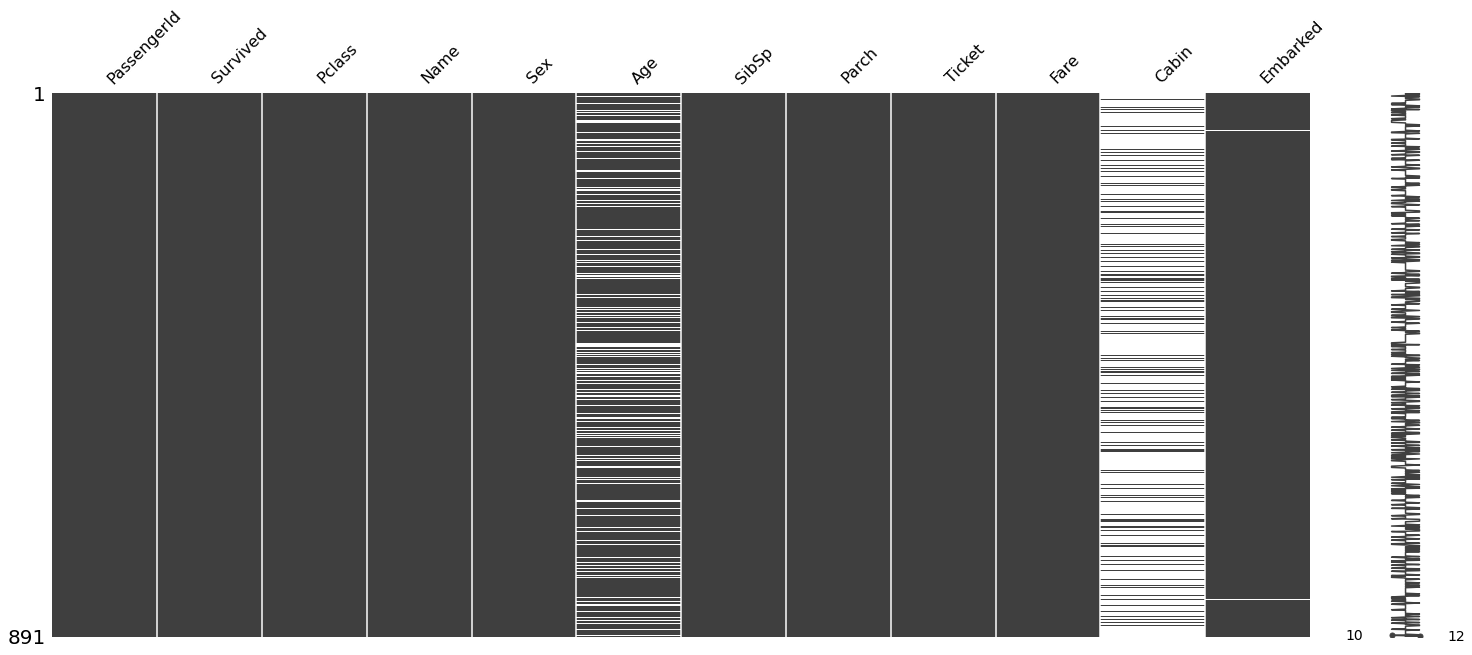

In [9]:
import missingno as msno

msno.matrix(df)
plt.show()

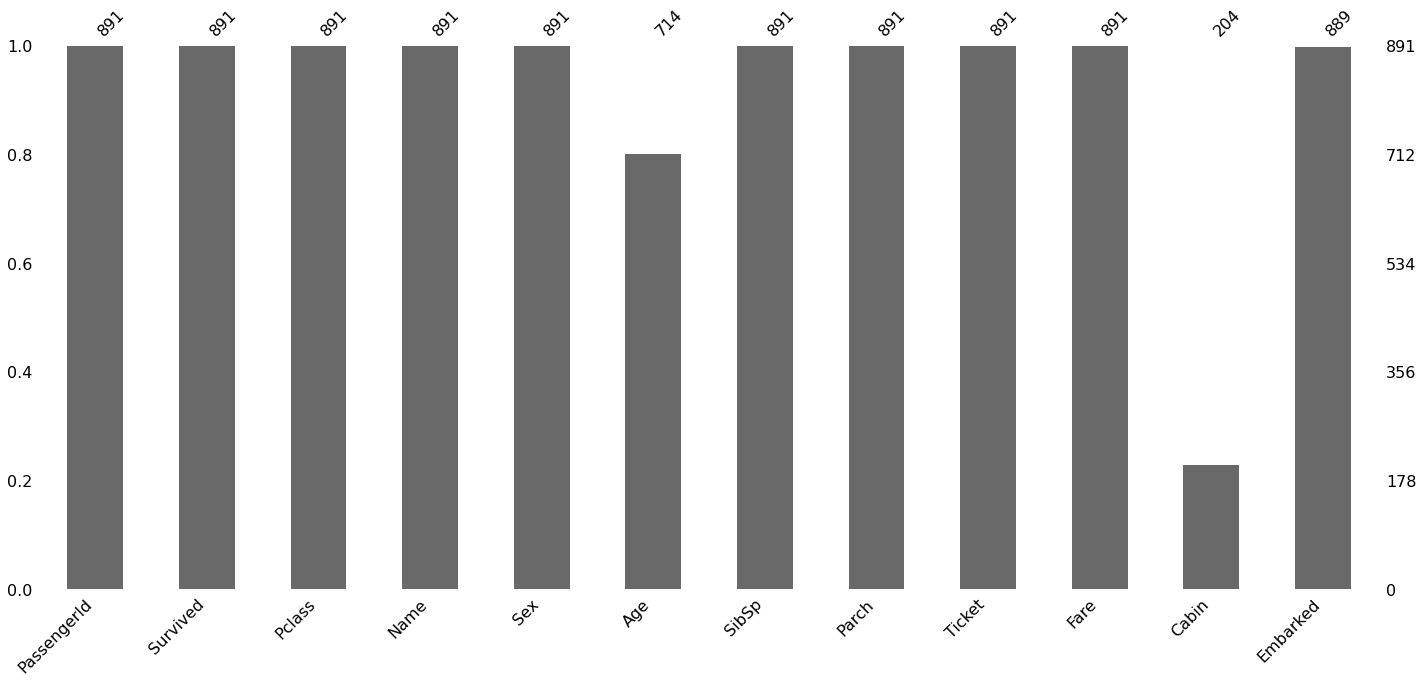

In [10]:
msno.bar(df)
plt.show()

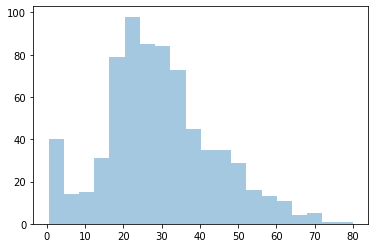

In [11]:
# Age, Cabin, Embarked
## Age
sns.distplot(df[['Age']], kde=False)
plt.show()

In [12]:
df[['Age']].fillna(df.Age.mean(), axis=1).isnull().sum()

Age    0
dtype: int64

['male' 'female']


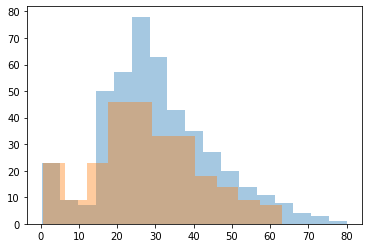

In [13]:
print(df.Sex.unique())
df_agem = df[df.Sex == 'male']
df_agefm = df[df.Sex == 'female']
sns.distplot(df_agem[['Age']], kde=False)
sns.distplot(df_agefm[['Age']], kde=False)
plt.show()

In [14]:
df_agem = df_agem[['Age']].fillna(df_agem[['Age']].mean())
df_agefm = df_agefm[['Age']].fillna(df_agefm[['Age']].mean())

In [15]:
display(df_agem, df_agefm)

,Age
0,22.00
4,35.00
5,30.73
6,54.00
7,2.00
...,...
883,28.00
884,25.00
886,27.00
889,26.00


,Age
1,38.00
2,26.00
3,35.00
8,27.00
9,14.00
...,...
880,25.00
882,22.00
885,39.00
887,19.00


In [16]:
df[['Age']] = pd.concat([df_agem, df_agefm], axis=0).sort_index()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
## Embarked
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
df[['Embarked']].fillna(df['Embarked'].mode()[0], axis=0).isnull().sum()

Embarked    0
dtype: int64

In [19]:
df[['Embarked']] = df[['Embarked']].fillna(df['Embarked'].mode()[0], axis=0)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [20]:
## Cabin
df.dropna(axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.92,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C


In [21]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [22]:
df['Cabin'] = df['Cabin'].str.slice(0,1)
df['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [23]:
df_cabin_null = df[df['Cabin'].isnull()]
df_cabin_fill = df[~df['Cabin'].isnull()]
display(df_cabin_null, df_cabin_fill)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,30.73,0,0,330877,8.46,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.05,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.00,0,5,382652,29.12,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.92,1,2,W./C. 6607,23.45,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,E,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.70,G,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.55,C,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.00,1,1,11751,52.55,D,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.00,0,0,695,5.00,B,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.00,0,1,11767,83.16,C,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B,S


In [24]:
pd.crosstab(df_cabin_fill.Cabin, df_cabin_fill.Survived)

Survived,0,1
Cabin,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
T,1,0


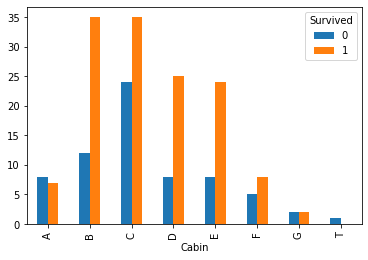

In [25]:
pd.crosstab(df_cabin_fill.Cabin, df_cabin_fill.Survived).plot(kind='bar')
plt.show()

In [26]:
df_cabin_null[['Survived']].value_counts()

Survived
0           481
1           206
dtype: int64

In [27]:
df['Cabin'] = df['Cabin'].fillna('Temp')
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

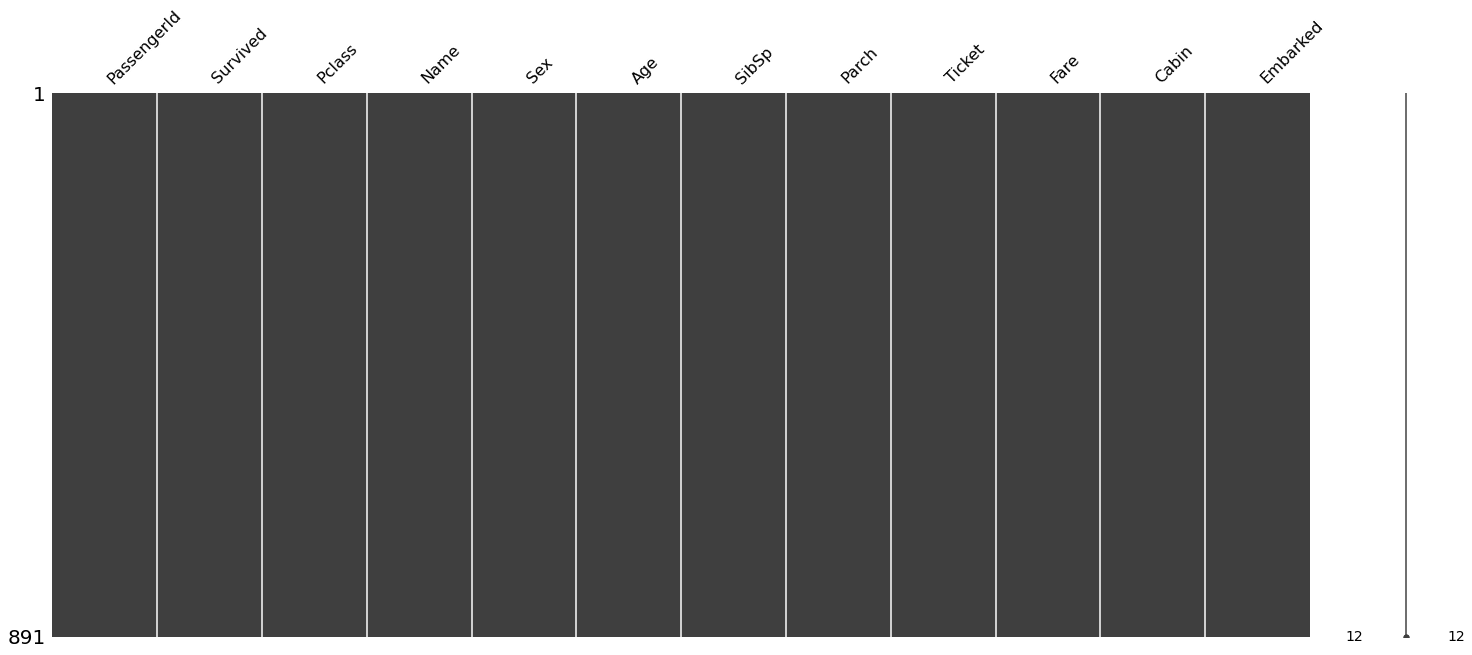

In [28]:
msno.matrix(df)
plt.show()

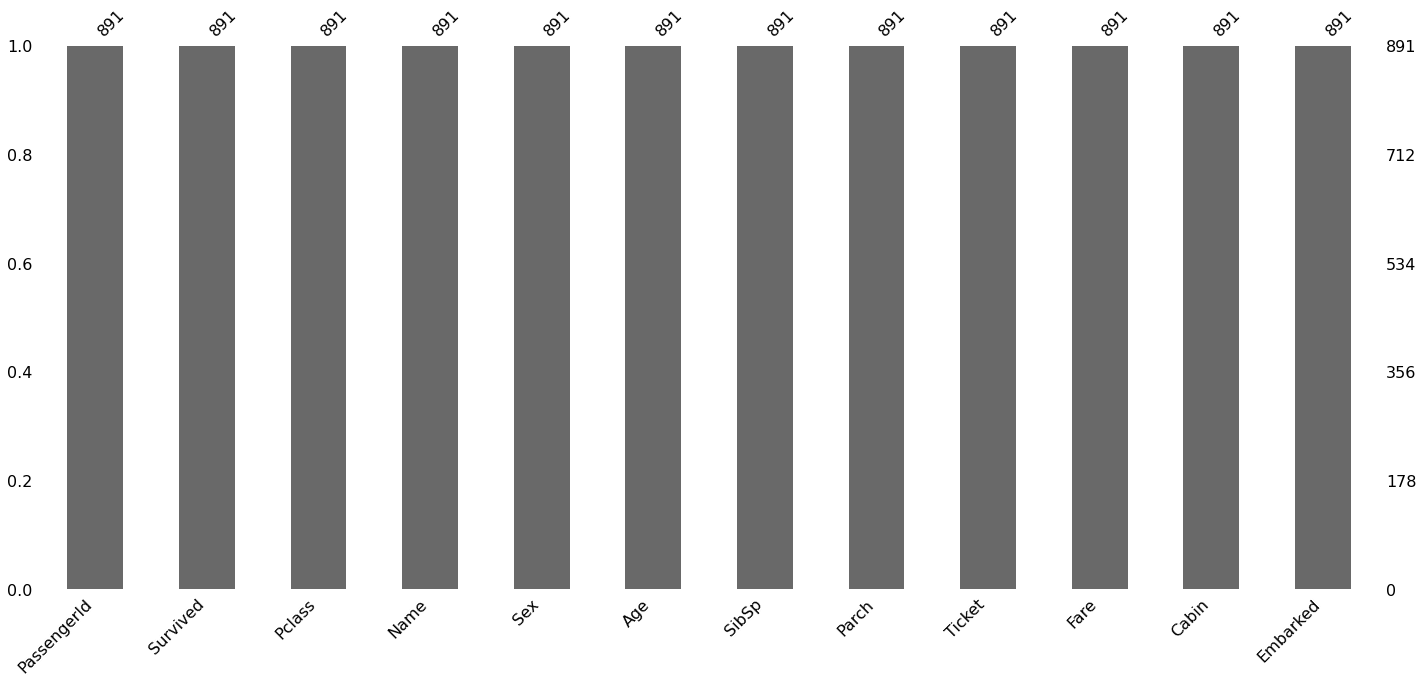

In [29]:
msno.bar(df)
plt.show()

### Code Summary1

In [30]:
def fillnull(df):
    # 결측값 처리
    ## Age
    df_agem = df[df.Sex == 'male']
    df_agem = df_agem[['Age']].fillna(df_agem[['Age']].mean())

    df_agefm = df[df.Sex == 'female']
    df_agefm = df_agefm[['Age']].fillna(df_agefm[['Age']].mean())
    df[['Age']] = pd.concat([df_agem, df_agefm], axis=0).sort_index()

    ## Embarked
    df[['Embarked']] = df[['Embarked']].fillna(df['Embarked'].mode()[0], axis=0)

    ## Cabin
    df['Cabin'] = df['Cabin'].str.slice(0,1)
    df['Cabin'] = df['Cabin'].fillna('Temp')
    
    return df

In [31]:
# Data Loading
location = r'.\Data\Titanic\Titanic.csv'
df = pd.read_csv(location)

# Preprocessing
df = fillnull(df)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,Temp,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,Temp,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,Temp,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,Temp,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.92,1,2,W./C. 6607,23.45,Temp,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C,C


## 데이터 정리

In [32]:
# Name, Ticket
## Name
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [33]:
df['Name'].str.split(',', expand=True)[1]

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
886                                    Rev. Juozas
887                           Miss. Margaret Edith
888                 Miss. Catherine Helen "Carrie"
889                                Mr. Karl Howell
890                                    Mr. Patrick
Name: 1, Length: 891, dtype: object

In [34]:
name_sub = df['Name'].str.split(',', expand=True)[1]
name_sub.str.split('. ', expand=True)[0].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt', ' th',
       ' Jonkheer'], dtype=object)

In [35]:
name_sub = name_sub.str.split('. ', expand=True)[0]
name_sub.replace([' Mr'], 'Mr', inplace=True)
name_sub.replace([' Mrs'], 'Mrs', inplace=True)
name_sub.replace([' Ms', ' Miss'], 'Miss', inplace=True)
name_sub.replace([' Don', ' Mme', ' Lady', 'Sir', 'Mlle', ' th', ' Jonkheer'], 'Noble', inplace=True)
name_sub.replace([' Master', ' Major', ' Col', ' Capt', ' Sir', ' Mlle', ' Jonkheer'], 'Officer', inplace=True)
name_sub.replace([' Dr', ' Rev'], 'Priest', inplace=True)
name_sub.unique()

array(['Mr', 'Mrs', 'Miss', 'Officer', 'Noble', 'Priest'], dtype=object)

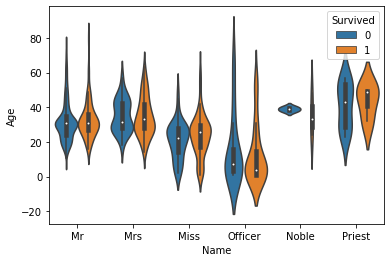

In [36]:
df['Name'] = name_sub.copy()
sns.violinplot(x='Name', y='Age', hue='Survived', data=df)
plt.show()

In [37]:
### Ticket
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [38]:
df['Ticket'] = df['Ticket'].str.replace('.','').str.replace('/','')
df['Ticket'] = df['Ticket'].str.strip().str.split(' ').str[0]
df['Ticket'].unique()

array(['A5', 'PC', 'STONO2', '113803', '373450', '330877', '17463',
       '349909', '347742', '237736', 'PP', '113783', '347082', '350406',
       '248706', '382652', '244373', '345763', '2649', '239865', '248698',
       '330923', '113788', '347077', '2631', '19950', '330959', '349216',
       '335677', 'CA', '113789', '2677', '345764', '2651', '7546',
       '11668', '349253', 'SCParis', '330958', 'SCA4', '370371', '14311',
       '2662', '349237', '3101295', 'A4', '2926', '113509', '19947',
       '2697', '2669', '113572', '36973', '347088', '2661', 'SP',
       '3101281', '315151', 'SOC', '2680', '1601', '348123', '349208',
       '374746', '248738', '364516', '345767', '345779', '330932',
       '113059', '3101278', 'WC', 'SOTONOQ', '343275', '343276', '347466',
       'WEP', '364500', '374910', '231919', '244367', '349245', '349215',
       '35281', '7540', '3101276', '349207', '343120', '312991', '349249',
       '371110', '110465', '2665', '324669', '4136', '2627', 'STONO',
  

In [39]:
df.loc[df['Ticket'].str.isdigit(), 'Ticket'] = 'NUM'
df['Ticket'].unique()

array(['A5', 'PC', 'STONO2', 'NUM', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON'], dtype=object)

In [40]:
pd.crosstab(df.Ticket, df.Survived)

Survived,0,1
Ticket,,
A4,7,0
A5,19,2
AS,1,0
C,3,2
CA,27,14
...,...,...
STONO,7,5
STONO2,3,3
SWPP,0,2


In [41]:
# Age group
display(df['Age'].describe())

count   891.00
mean     29.74
std      13.01
min       0.42
25%      22.00
50%      30.00
75%      35.00
max      80.00
Name: Age, dtype: float64

In [42]:
age_interval = [10, 20, 30, 40, 50, 60, 70, 80, 90]
if df['Age'].max() > len(age_interval):
    df['Age'] = np.digitize(df['Age'], bins=age_interval)

display(df['Age'].describe())

count   891.00
mean      2.56
std       1.36
min       0.00
25%       2.00
50%       3.00
75%       3.00
max       8.00
Name: Age, dtype: float64

### Code Summary2

In [43]:
def prep(df):
    # Name
    name_sub = df['Name'].str.split(',', expand=True)[1]
    name_sub = name_sub.str.split('. ', expand=True)[0]
    name_sub.replace([' Mr'], 'Mr', inplace=True)
    name_sub.replace([' Mrs'], 'Mrs', inplace=True)
    name_sub.replace([' Ms', ' Miss'], 'Miss', inplace=True)
    name_sub.replace([' Don', ' Mme', ' Lady', 'Sir', 'Mlle', ' th', ' Jonkheer'], 'Noble', inplace=True)
    name_sub.replace([' Master', ' Major', ' Col', ' Capt', ' Sir', ' Mlle', ' Jonkheer'], 'Officer', inplace=True)
    name_sub.replace([' Dr', ' Rev'], 'Priest', inplace=True)
    df['Name'] = name_sub.copy()

    # Ticket
    df['Ticket'] = df['Ticket'].str.replace('.','').str.replace('/','')
    df['Ticket'] = df['Ticket'].str.strip().str.split(' ').str[0]
    df.loc[df['Ticket'].str.isdigit(), 'Ticket'] = 'NUM'

    # Age
    age_interval = [10, 20, 30, 40, 50, 60, 70, 80, 90]
    if df['Age'].max() > len(age_interval):
        df['Age'] = np.digitize(df['Age'], bins=age_interval)
        
    return df

In [44]:
# Data Loading
location = r'.\Data\Titanic\Titanic.csv'
df = pd.read_csv(location)

# Preprocessing
df = fillnull(df)
df = prep(df)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,2,1,0,A5,7.25,Temp,S
1,2,1,1,Mrs,female,3,1,0,PC,71.28,C,C
2,3,1,3,Miss,female,2,0,0,STONO2,7.92,Temp,S
3,4,1,1,Mrs,female,3,1,0,NUM,53.10,C,S
4,5,0,3,Mr,male,3,0,0,NUM,8.05,Temp,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Priest,male,2,0,0,NUM,13.00,Temp,S
887,888,1,1,Miss,female,1,0,0,NUM,30.00,B,S
888,889,0,3,Miss,female,2,1,2,WC,23.45,Temp,S
889,890,1,1,Mr,male,2,0,0,NUM,30.00,C,C


## 데이터 분리

In [45]:
Y_colname = ['Survived']
X_colname = [x for x in df.columns if x not in Y_colname]
Y_colname, X_colname

(['Survived'],
 ['PassengerId',
  'Pclass',
  'Name',
  'Sex',
  'Age',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'Embarked'])

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                    test_size=0.2, random_state=123)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(712, 11) (712, 1)
(179, 11) (179, 1)


In [47]:
display(X_train, Y_train)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
329,330,1,Miss,female,1,0,1,NUM,57.98,B,C
749,750,3,Mr,male,3,0,0,NUM,7.75,Temp,Q
203,204,3,Mr,male,4,0,0,NUM,7.22,Temp,C
421,422,3,Mr,male,2,0,0,A5,7.73,Temp,Q
97,98,1,Mr,male,2,0,1,PC,63.36,D,C
...,...,...,...,...,...,...,...,...,...,...,...
98,99,2,Mrs,female,3,0,1,NUM,23.00,Temp,S
322,323,2,Miss,female,3,0,0,NUM,12.35,Temp,Q
382,383,3,Mr,male,3,0,0,STONO,7.92,Temp,S
365,366,3,Mr,male,3,0,0,C,7.25,Temp,S


,Survived
329,1
749,0
203,0
421,0
97,1
...,...
98,1
322,1
382,0
365,0


### Code Summary3

In [48]:
def datasplit(df, Y_colname, test_size=0.2, random_state=123):
    X_colname = [x for x in df.columns if x not in Y_colname]
       
    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                        test_size=test_size, random_state=random_state)
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test

In [49]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,2,1,0,A5,7.25,Temp,S
1,2,1,1,Mrs,female,3,1,0,PC,71.28,C,C
2,3,1,3,Miss,female,2,0,0,STONO2,7.92,Temp,S
3,4,1,1,Mrs,female,3,1,0,NUM,53.10,C,S
4,5,0,3,Mr,male,3,0,0,NUM,8.05,Temp,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Priest,male,2,0,0,NUM,13.00,Temp,S
887,888,1,1,Miss,female,1,0,0,NUM,30.00,B,S
888,889,0,3,Miss,female,2,1,2,WC,23.45,Temp,S
889,890,1,1,Mr,male,2,0,0,NUM,30.00,C,C


In [50]:
# Data Loading
location = r'.\Data\Titanic\Titanic.csv'
df = pd.read_csv(location)

# Preprocessing
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

(712, 11) (712, 1)
(179, 11) (179, 1)


In [51]:
display(X_test, Y_test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
172,173,3,Miss,female,0,1,1,NUM,11.13,Temp,S
524,525,3,Mr,male,3,0,0,NUM,7.23,Temp,C
452,453,1,Mr,male,3,0,0,NUM,27.75,C,C
170,171,1,Mr,male,6,0,0,NUM,33.50,B,S
620,621,3,Mr,male,2,1,0,NUM,14.45,Temp,C
...,...,...,...,...,...,...,...,...,...,...,...
388,389,3,Mr,male,3,0,0,NUM,7.73,Temp,Q
338,339,3,Mr,male,4,0,0,NUM,8.05,Temp,S
827,828,2,Officer,male,0,0,2,SCPARIS,37.00,Temp,C
773,774,3,Mr,male,3,0,0,NUM,7.22,Temp,C


,Survived
172,1
524,0
452,0
170,0
620,0
...,...
388,0
338,1
827,1
773,0


## 데이터 변환

In [52]:
# Label Encoding
## Sex, Cabin
X_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,712.00,NaN,NaN,NaN,444.40,255.98,1.00,223.75,444.50,658.25,891.00
Pclass,712.00,NaN,NaN,NaN,2.32,0.83,1.00,2.00,3.00,3.00,3.00
Name,712,6,Mr,419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,712,2,male,461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,712.00,NaN,NaN,NaN,2.57,1.34,0.00,2.00,3.00,3.00,8.00
SibSp,712.00,NaN,NaN,NaN,0.51,1.11,0.00,0.00,0.00,1.00,8.00
Parch,712.00,NaN,NaN,NaN,0.36,0.77,0.00,0.00,0.00,0.00,5.00
Ticket,712,29,NUM,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,712.00,NaN,NaN,NaN,32.39,52.22,0.00,7.90,13.50,30.07,512.33
Cabin,712,9,Temp,556,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
for i in X_train.columns[X_train.dtypes == 'object']:
    print(i, len(X_train[i].unique()))

Name 6
Sex 2
Ticket 29
Cabin 9
Embarked 3


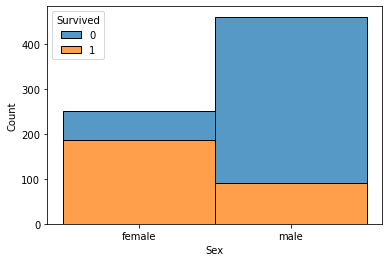

In [54]:
## Sex
sns.histplot(x='Sex', hue='Survived', multiple='stack', data=pd.concat([Y_train, X_train], axis=1))
plt.show()

In [55]:
### approach 1
# X_train.loc[X_train['Sex'] == 'female', 'Sex'] = 0
# X_train.loc[X_train['Sex'] == 'male', 'Sex'] = 1

In [56]:
### approach 2
encoder = preprocessing.LabelEncoder()
encoder = encoder.fit(X_train['Sex'])
print(encoder.classes_)

['female' 'male']


In [57]:
encoder.transform(X_train['Sex'])

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [58]:
# X_train['Sex'] = encoder.transform(X_train['Sex'])

In [59]:
encoder.transform(X_test['Sex'])

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1])

In [60]:
## 에러방지
for label in X_test['Sex'].unique():
    if label not in encoder.classes_: # unseen label인 경우
        encoder.classes_ = np.append(encoder.classes_, label) # 미처리 시 ValueError발생

encoder.transform(X_test['Sex'])

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1])

In [61]:
encoder = preprocessing.LabelEncoder()
encoder = encoder.fit(X_train['Sex'])

for label in X_test['Sex'].unique():
    if label not in encoder.classes_: # unseen label인 경우
        encoder.classes_ = np.append(encoder.classes_, label) # 미처리 시 ValueError발생
        
X_train['Sex'] = encoder.transform(X_train['Sex'])
X_test['Sex'] = encoder.transform(X_test['Sex'])

In [62]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
172,173,3,Miss,0,0,1,1,NUM,11.13,Temp,S
524,525,3,Mr,1,3,0,0,NUM,7.23,Temp,C
452,453,1,Mr,1,3,0,0,NUM,27.75,C,C
170,171,1,Mr,1,6,0,0,NUM,33.50,B,S
620,621,3,Mr,1,2,1,0,NUM,14.45,Temp,C
...,...,...,...,...,...,...,...,...,...,...,...
388,389,3,Mr,1,3,0,0,NUM,7.73,Temp,Q
338,339,3,Mr,1,4,0,0,NUM,8.05,Temp,S
827,828,2,Officer,1,0,0,2,SCPARIS,37.00,Temp,C
773,774,3,Mr,1,3,0,0,NUM,7.22,Temp,C


In [63]:
## Cabin
X_train['Cabin'].unique()

array(['B', 'Temp', 'D', 'C', 'E', 'F', 'A', 'G', 'T'], dtype=object)

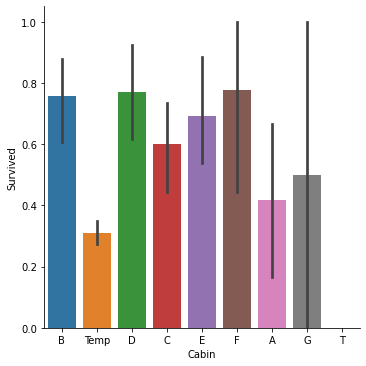

In [64]:
sns.catplot(x='Cabin', y='Survived', kind='bar',
            data=pd.concat([Y_train, X_train], axis=1))
plt.show()

In [65]:
encoder = preprocessing.LabelEncoder()
encoder = encoder.fit(X_train['Cabin'])

for label in X_test['Cabin'].unique():
    if label not in encoder.classes_:
        encoder.classes_ = np.append(encoder.classes_, label)
        
X_train['Cabin'] = encoder.transform(X_train['Cabin'])
X_test['Cabin'] = encoder.transform(X_test['Cabin'])

In [66]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
172,173,3,Miss,0,0,1,1,NUM,11.13,8,S
524,525,3,Mr,1,3,0,0,NUM,7.23,8,C
452,453,1,Mr,1,3,0,0,NUM,27.75,2,C
170,171,1,Mr,1,6,0,0,NUM,33.50,1,S
620,621,3,Mr,1,2,1,0,NUM,14.45,8,C
...,...,...,...,...,...,...,...,...,...,...,...
388,389,3,Mr,1,3,0,0,NUM,7.73,8,Q
338,339,3,Mr,1,4,0,0,NUM,8.05,8,S
827,828,2,Officer,1,0,0,2,SCPARIS,37.00,8,C
773,774,3,Mr,1,3,0,0,NUM,7.22,8,C


In [67]:
## Ticket
X_train['Ticket'].unique()

array(['NUM', 'A5', 'PC', 'SCParis', 'SOPP', 'SWPP', 'A4', 'CA', 'SC',
       'SOTONOQ', 'SOP', 'WC', 'FCC', 'LINE', 'SOC', 'C', 'SCPARIS',
       'PPP', 'STONO2', 'SCA4', 'STONO', 'SCAH', 'CASOTON', 'AS', 'PP',
       'SOTONO2', 'WEP', 'SP', 'Fa'], dtype=object)

In [68]:
# encoder = preprocessing.LabelEncoder()
# encoder = encoder.fit(X_train['Ticket'])

# for label in X_test['Ticket'].unique():
#     if label not in encoder.classes_:
#         encoder.classes_ = np.append(encoder.classes_, label)
        
# X_train['Ticket'] = encoder.transform(X_train['Ticket'])
# X_test['Ticket'] = encoder.transform(X_test['Ticket'])

In [69]:
# 정리
label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()

for i in label_colname: # 대상 변수들마다
    encoder = encoder.fit(X_train[i])

    for label in X_test[i].unique():
        if label not in encoder.classes_:
            encoder.classes_ = np.append(encoder.classes_, label)

    X_train[i] = encoder.transform(X_train[i])
    X_test[i] = encoder.transform(X_test[i])

In [70]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
172,173,3,Miss,0,0,1,1,9,11.13,8,S
524,525,3,Mr,1,3,0,0,9,7.23,8,C
452,453,1,Mr,1,3,0,0,9,27.75,2,C
170,171,1,Mr,1,6,0,0,9,33.50,1,S
620,621,3,Mr,1,2,1,0,9,14.45,8,C
...,...,...,...,...,...,...,...,...,...,...,...
388,389,3,Mr,1,3,0,0,9,7.73,8,Q
338,339,3,Mr,1,4,0,0,9,8.05,8,S
827,828,2,Officer,1,0,0,2,16,37.00,8,C
773,774,3,Mr,1,3,0,0,9,7.22,8,C


In [71]:
# One-hot Encoding
## Name, Embarked
X_train['Name'].unique()

array(['Miss', 'Mr', 'Mrs', 'Officer', 'Priest', 'Noble'], dtype=object)

In [72]:
pd.get_dummies(X_train, columns=['Name'], drop_first=True)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest
329,330,1,0,1,0,1,9,57.98,1,C,0,0,0,0,0
749,750,3,1,3,0,0,9,7.75,8,Q,1,0,0,0,0
203,204,3,1,4,0,0,9,7.22,8,C,1,0,0,0,0
421,422,3,1,2,0,0,1,7.73,8,Q,1,0,0,0,0
97,98,1,1,2,0,1,10,63.36,3,C,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,2,0,3,0,1,9,23.00,8,S,0,1,0,0,0
322,323,2,0,3,0,0,9,12.35,8,Q,0,0,0,0,0
382,383,3,1,3,0,0,24,7.92,8,S,1,0,0,0,0
365,366,3,1,3,0,0,3,7.25,8,S,1,0,0,0,0


In [73]:
if 'Name' in X_train.columns:
    X_train = pd.get_dummies(X_train, columns=['Name'], drop_first=True)

In [74]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest
329,330,1,0,1,0,1,9,57.98,1,C,0,0,0,0,0
749,750,3,1,3,0,0,9,7.75,8,Q,1,0,0,0,0
203,204,3,1,4,0,0,9,7.22,8,C,1,0,0,0,0
421,422,3,1,2,0,0,1,7.73,8,Q,1,0,0,0,0
97,98,1,1,2,0,1,10,63.36,3,C,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,2,0,3,0,1,9,23.00,8,S,0,1,0,0,0
322,323,2,0,3,0,0,9,12.35,8,Q,0,0,0,0,0
382,383,3,1,3,0,0,24,7.92,8,S,1,0,0,0,0
365,366,3,1,3,0,0,3,7.25,8,S,1,0,0,0,0


In [75]:
## Embarked
X_train['Embarked'].unique()

array(['C', 'Q', 'S'], dtype=object)

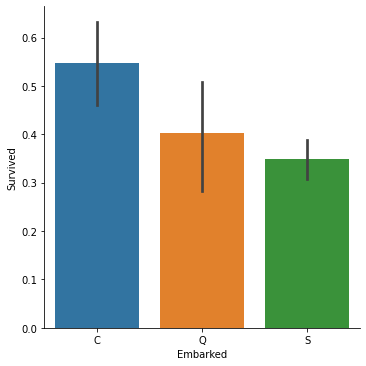

In [76]:
sns.catplot(x='Embarked', y='Survived', kind='bar',
            data=pd.concat([Y_train, X_train], axis=1))
plt.show()

In [77]:
if 'Embarked' in X_train.columns:
    X_train = pd.get_dummies(X_train, columns=['Embarked'], drop_first=True)

In [78]:
# 정리
onehot_colname = ['Name', 'Embarked']

for i in onehot_colname:
    if i in X_train.columns:
        X_train = pd.get_dummies(X_train, columns=[i], drop_first=True)
        

In [79]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
329,330,1,0,1,0,1,9,57.98,1,0,0,0,0,0,0,0
749,750,3,1,3,0,0,9,7.75,8,1,0,0,0,0,1,0
203,204,3,1,4,0,0,9,7.22,8,1,0,0,0,0,0,0
421,422,3,1,2,0,0,1,7.73,8,1,0,0,0,0,1,0
97,98,1,1,2,0,1,10,63.36,3,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,2,0,3,0,1,9,23.00,8,0,1,0,0,0,0,1
322,323,2,0,3,0,0,9,12.35,8,0,0,0,0,0,1,0
382,383,3,1,3,0,0,24,7.92,8,1,0,0,0,0,0,1
365,366,3,1,3,0,0,3,7.25,8,1,0,0,0,0,0,1


### Code Summary4

In [80]:
def label_encoding(X_train, X_test, colname, encoder):
    X_train_le = X_train.copy()
    X_test_le = X_test.copy()
    
    for i in colname: # 대상 변수들마다
        encoder = encoder.fit(X_train[i])

        for label in X_test[i].unique():
            if label not in encoder.classes_:
                encoder.classes_ = np.append(encoder.classes_, label)

        X_train_le[i] = encoder.transform(X_train[i])
        X_test_le[i] = encoder.transform(X_test[i])
        
    return X_train_le, X_test_le


def onehot_encoding(df, colname):
    df_ohe = df.copy()
    
    for i in colname:
        if i in df.columns:
            df_ohe = pd.get_dummies(df_ohe, columns=[i], drop_first=True)
            
    return df_ohe


def col_mapping(X_train, X_test):
    X_tr = X_train.copy()
    X_te = X_test.copy()
    
    # checking the difference of columns
    X_te_noncol = [i for i in X_tr.columns if i not in X_te.columns]
    X_tr_noncol = [i for i in X_te.columns if i not in X_tr.columns]

    # duplicates
    if X_te_noncol != []:
        for i in X_te_noncol:
            X_te[i] = 0
            X_te = X_te[X_tr.columns].copy()
            
    if X_tr_noncol != []:
        for i in X_tr_noncol:
            X_tr[i] = 0
            X_tr = X_tr[X_te.columns].copy()
            
    return X_tr, X_te

In [81]:
# Data Loading
location = r'.\Data\Titanic\Titanic.csv'
df = pd.read_csv(location)

# Preprocessing
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

(712, 11) (712, 1)
(179, 11) (179, 1)


In [82]:
display(X_train_fe, X_test_fe)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
329,330,1,0,1,0,1,9,57.98,1,0,0,0,0,0,0,0
749,750,3,1,3,0,0,9,7.75,8,1,0,0,0,0,1,0
203,204,3,1,4,0,0,9,7.22,8,1,0,0,0,0,0,0
421,422,3,1,2,0,0,1,7.73,8,1,0,0,0,0,1,0
97,98,1,1,2,0,1,10,63.36,3,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,2,0,3,0,1,9,23.00,8,0,1,0,0,0,0,1
322,323,2,0,3,0,0,9,12.35,8,0,0,0,0,0,1,0
382,383,3,1,3,0,0,24,7.92,8,1,0,0,0,0,0,1
365,366,3,1,3,0,0,3,7.25,8,1,0,0,0,0,0,1


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
172,173,3,0,0,1,1,9,11.13,8,0,0,0,0,0,0,1
524,525,3,1,3,0,0,9,7.23,8,1,0,0,0,0,0,0
452,453,1,1,3,0,0,9,27.75,2,1,0,0,0,0,0,0
170,171,1,1,6,0,0,9,33.50,1,1,0,0,0,0,0,1
620,621,3,1,2,1,0,9,14.45,8,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,389,3,1,3,0,0,9,7.73,8,1,0,0,0,0,1,0
338,339,3,1,4,0,0,9,8.05,8,1,0,0,0,0,0,1
827,828,2,1,0,0,2,16,37.00,8,0,0,0,1,0,0,0
773,774,3,1,3,0,0,9,7.22,8,1,0,0,0,0,0,0


## 스케일 조정

```python
preprocessing.StandardScaler()
preprocessing.MinMaxScaler()
preprocessing.RobustScaler()
preprocessing.Normalizer()
```

### Code Summary5

In [83]:
def scale(scaler, X_train, X_test):
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                                   index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                                  index=X_test.index, columns=X_test.columns)
    
    return X_train_scaling, X_test_scaling

In [84]:
# Data Loading
location = r'.\Data\Titanic\Titanic.csv'
df = pd.read_csv(location)

# Preprocessing
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

(712, 11) (712, 1)
(179, 11) (179, 1)


In [85]:
display(X_train_fes, X_test_fes)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
329,0.37,0.00,0.00,0.12,0.00,0.20,0.32,0.11,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00
749,0.84,1.00,1.00,0.38,0.00,0.00,0.32,0.02,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
203,0.23,1.00,1.00,0.50,0.00,0.00,0.32,0.01,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
421,0.47,1.00,1.00,0.25,0.00,0.00,0.04,0.02,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
97,0.11,0.00,1.00,0.25,0.00,0.20,0.36,0.12,0.38,1.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.11,0.50,0.00,0.38,0.00,0.20,0.32,0.04,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
322,0.36,0.50,0.00,0.38,0.00,0.00,0.32,0.02,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
382,0.43,1.00,1.00,0.38,0.00,0.00,0.86,0.02,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
365,0.41,1.00,1.00,0.38,0.00,0.00,0.11,0.01,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
172,0.19,1.00,0.00,0.00,0.12,0.20,0.32,0.02,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
524,0.59,1.00,1.00,0.38,0.00,0.00,0.32,0.01,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
452,0.51,0.00,1.00,0.38,0.00,0.00,0.32,0.05,0.25,1.00,0.00,0.00,0.00,0.00,0.00,0.00
170,0.19,0.00,1.00,0.75,0.00,0.00,0.32,0.07,0.12,1.00,0.00,0.00,0.00,0.00,0.00,1.00
620,0.70,1.00,1.00,0.25,0.12,0.00,0.32,0.03,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,0.44,1.00,1.00,0.38,0.00,0.00,0.32,0.02,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
338,0.38,1.00,1.00,0.50,0.00,0.00,0.32,0.02,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
827,0.93,0.50,1.00,0.00,0.00,0.40,0.57,0.07,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
773,0.87,1.00,1.00,0.38,0.00,0.00,0.32,0.01,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


In [86]:
display(X_train_fes.describe().T, X_test_fes.describe().T)

,count,mean,std,min,25%,50%,75%,max
PassengerId,712.00,0.50,0.29,0.00,0.25,0.50,0.74,1.00
Pclass,712.00,0.66,0.41,0.00,0.50,1.00,1.00,1.00
Sex,712.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00
Age,712.00,0.32,0.17,0.00,0.25,0.38,0.38,1.00
SibSp,712.00,0.06,0.14,0.00,0.00,0.00,0.12,1.00
Parch,712.00,0.07,0.15,0.00,0.00,0.00,0.00,1.00
Ticket,712.00,0.35,0.16,0.00,0.32,0.32,0.32,1.00
Fare,712.00,0.06,0.10,0.00,0.02,0.03,0.06,1.00
Cabin,712.00,0.85,0.30,0.00,1.00,1.00,1.00,1.00
Name_Mr,712.00,0.59,0.49,0.00,0.00,1.00,1.00,1.00


,count,mean,std,min,25%,50%,75%,max
PassengerId,179.00,0.51,0.30,0.00,0.25,0.51,0.77,1.00
Pclass,179.00,0.62,0.43,0.00,0.00,1.00,1.00,1.00
Sex,179.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00
Age,179.00,0.31,0.18,0.00,0.25,0.25,0.38,0.75
SibSp,179.00,0.07,0.13,0.00,0.00,0.00,0.12,0.62
Parch,179.00,0.09,0.19,0.00,0.00,0.00,0.20,1.20
Ticket,179.00,0.34,0.15,0.04,0.32,0.32,0.32,1.07
Fare,179.00,0.06,0.07,0.00,0.02,0.04,0.07,0.48
Cabin,179.00,0.81,0.33,0.00,0.62,1.00,1.00,1.00
Name_Mr,179.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


## Code Summary

In [87]:
def fillnull(df):
    # 결측값 처리
    ## Age
    df_agem = df[df.Sex == 'male']
    df_agem = df_agem[['Age']].fillna(df_agem[['Age']].mean())

    df_agefm = df[df.Sex == 'female']
    df_agefm = df_agefm[['Age']].fillna(df_agefm[['Age']].mean())
    df[['Age']] = pd.concat([df_agem, df_agefm], axis=0).sort_index()

    ## Embarked
    df[['Embarked']] = df[['Embarked']].fillna(df['Embarked'].mode()[0], axis=0)

    ## Cabin
    df['Cabin'] = df['Cabin'].str.slice(0,1)
    df['Cabin'] = df['Cabin'].fillna('Temp')
    
    return df


def prep(df):
    # Name
    name_sub = df['Name'].str.split(',', expand=True)[1]
    name_sub = name_sub.str.split('. ', expand=True)[0]
    name_sub.replace([' Mr'], 'Mr', inplace=True)
    name_sub.replace([' Mrs'], 'Mrs', inplace=True)
    name_sub.replace([' Ms', ' Miss'], 'Miss', inplace=True)
    name_sub.replace([' Don', ' Mme', ' Lady', 'Sir', 'Mlle', ' th', ' Jonkheer'], 'Noble', inplace=True)
    name_sub.replace([' Master', ' Major', ' Col', ' Capt', ' Sir', ' Mlle', ' Jonkheer'], 'Officer', inplace=True)
    name_sub.replace([' Dr', ' Rev'], 'Priest', inplace=True)
    df['Name'] = name_sub.copy()

    # Ticket
    df['Ticket'] = df['Ticket'].str.replace('.','').str.replace('/','')
    df['Ticket'] = df['Ticket'].str.strip().str.split(' ').str[0]
    df.loc[df['Ticket'].str.isdigit(), 'Ticket'] = 'NUM'

    # Age
    age_interval = [10, 20, 30, 40, 50, 60, 70, 80, 90]
    if df['Age'].max() > len(age_interval):
        df['Age'] = np.digitize(df['Age'], bins=age_interval)
        
    return df


def datasplit(df, Y_colname, test_size=0.2, random_state=123):
    X_colname = [x for x in df.columns if x not in Y_colname]
       
    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                        test_size=test_size, random_state=random_state)
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test


def label_encoding(X_train, X_test, colname, encoder):
    X_train_le = X_train.copy()
    X_test_le = X_test.copy()
    
    for i in colname: # 대상 변수들마다
        encoder = encoder.fit(X_train[i])

        for label in X_test[i].unique():
            if label not in encoder.classes_:
                encoder.classes_ = np.append(encoder.classes_, label)

        X_train_le[i] = encoder.transform(X_train[i])
        X_test_le[i] = encoder.transform(X_test[i])
        
    return X_train_le, X_test_le


def onehot_encoding(df, colname):
    df_ohe = df.copy()
    
    for i in colname:
        if i in df.columns:
            df_ohe = pd.get_dummies(df_ohe, columns=[i], drop_first=True)
            
    return df_ohe


def col_mapping(X_train, X_test):
    X_tr = X_train.copy()
    X_te = X_test.copy()
    
    # checking the difference of columns
    X_te_noncol = [i for i in X_tr.columns if i not in X_te.columns]
    X_tr_noncol = [i for i in X_te.columns if i not in X_tr.columns]

    # duplicates
    if X_te_noncol != []:
        for i in X_te_noncol:
            X_te[i] = 0
            X_te = X_te[X_tr.columns].copy()
            
    if X_tr_noncol != []:
        for i in X_tr_noncol:
            X_tr[i] = 0
            X_tr = X_tr[X_te.columns].copy()
            
    return X_tr, X_te


def scale(scaler, X_train, X_test):
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                                   index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                                  index=X_test.index, columns=X_test.columns)
    
    return X_train_scaling, X_test_scaling

In [88]:
# Data Loading
location = r'.\Data\Titanic\Titanic.csv'
df = pd.read_csv(location)

# Preprocessing
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

(712, 11) (712, 1)
(179, 11) (179, 1)


In [89]:
display(X_train, X_test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
329,330,1,Miss,female,1,0,1,NUM,57.98,B,C
749,750,3,Mr,male,3,0,0,NUM,7.75,Temp,Q
203,204,3,Mr,male,4,0,0,NUM,7.22,Temp,C
421,422,3,Mr,male,2,0,0,A5,7.73,Temp,Q
97,98,1,Mr,male,2,0,1,PC,63.36,D,C
...,...,...,...,...,...,...,...,...,...,...,...
98,99,2,Mrs,female,3,0,1,NUM,23.00,Temp,S
322,323,2,Miss,female,3,0,0,NUM,12.35,Temp,Q
382,383,3,Mr,male,3,0,0,STONO,7.92,Temp,S
365,366,3,Mr,male,3,0,0,C,7.25,Temp,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
172,173,3,Miss,female,0,1,1,NUM,11.13,Temp,S
524,525,3,Mr,male,3,0,0,NUM,7.23,Temp,C
452,453,1,Mr,male,3,0,0,NUM,27.75,C,C
170,171,1,Mr,male,6,0,0,NUM,33.50,B,S
620,621,3,Mr,male,2,1,0,NUM,14.45,Temp,C
...,...,...,...,...,...,...,...,...,...,...,...
388,389,3,Mr,male,3,0,0,NUM,7.73,Temp,Q
338,339,3,Mr,male,4,0,0,NUM,8.05,Temp,S
827,828,2,Officer,male,0,0,2,SCPARIS,37.00,Temp,C
773,774,3,Mr,male,3,0,0,NUM,7.22,Temp,C


In [90]:
display(X_train_fe, X_test_fe)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
329,330,1,0,1,0,1,9,57.98,1,0,0,0,0,0,0,0
749,750,3,1,3,0,0,9,7.75,8,1,0,0,0,0,1,0
203,204,3,1,4,0,0,9,7.22,8,1,0,0,0,0,0,0
421,422,3,1,2,0,0,1,7.73,8,1,0,0,0,0,1,0
97,98,1,1,2,0,1,10,63.36,3,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,2,0,3,0,1,9,23.00,8,0,1,0,0,0,0,1
322,323,2,0,3,0,0,9,12.35,8,0,0,0,0,0,1,0
382,383,3,1,3,0,0,24,7.92,8,1,0,0,0,0,0,1
365,366,3,1,3,0,0,3,7.25,8,1,0,0,0,0,0,1


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
172,173,3,0,0,1,1,9,11.13,8,0,0,0,0,0,0,1
524,525,3,1,3,0,0,9,7.23,8,1,0,0,0,0,0,0
452,453,1,1,3,0,0,9,27.75,2,1,0,0,0,0,0,0
170,171,1,1,6,0,0,9,33.50,1,1,0,0,0,0,0,1
620,621,3,1,2,1,0,9,14.45,8,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,389,3,1,3,0,0,9,7.73,8,1,0,0,0,0,1,0
338,339,3,1,4,0,0,9,8.05,8,1,0,0,0,0,0,1
827,828,2,1,0,0,2,16,37.00,8,0,0,0,1,0,0,0
773,774,3,1,3,0,0,9,7.22,8,1,0,0,0,0,0,0


In [91]:
display(X_train_fes, X_test_fes)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
329,0.37,0.00,0.00,0.12,0.00,0.20,0.32,0.11,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00
749,0.84,1.00,1.00,0.38,0.00,0.00,0.32,0.02,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
203,0.23,1.00,1.00,0.50,0.00,0.00,0.32,0.01,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
421,0.47,1.00,1.00,0.25,0.00,0.00,0.04,0.02,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
97,0.11,0.00,1.00,0.25,0.00,0.20,0.36,0.12,0.38,1.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.11,0.50,0.00,0.38,0.00,0.20,0.32,0.04,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
322,0.36,0.50,0.00,0.38,0.00,0.00,0.32,0.02,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
382,0.43,1.00,1.00,0.38,0.00,0.00,0.86,0.02,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
365,0.41,1.00,1.00,0.38,0.00,0.00,0.11,0.01,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_Mr,Name_Mrs,Name_Noble,Name_Officer,Name_Priest,Embarked_Q,Embarked_S
172,0.19,1.00,0.00,0.00,0.12,0.20,0.32,0.02,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
524,0.59,1.00,1.00,0.38,0.00,0.00,0.32,0.01,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
452,0.51,0.00,1.00,0.38,0.00,0.00,0.32,0.05,0.25,1.00,0.00,0.00,0.00,0.00,0.00,0.00
170,0.19,0.00,1.00,0.75,0.00,0.00,0.32,0.07,0.12,1.00,0.00,0.00,0.00,0.00,0.00,1.00
620,0.70,1.00,1.00,0.25,0.12,0.00,0.32,0.03,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,0.44,1.00,1.00,0.38,0.00,0.00,0.32,0.02,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
338,0.38,1.00,1.00,0.50,0.00,0.00,0.32,0.02,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
827,0.93,0.50,1.00,0.00,0.00,0.40,0.57,0.07,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
773,0.87,1.00,1.00,0.38,0.00,0.00,0.32,0.01,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


# Applying Base Algorithm: Logistic Regression
**1. Import Library**  
**2. Data Loading**   
**3. Preprocessing(Rearrange of Data)**   
**4. Applying Base Algorithm**   

In [92]:
# description of train X
X_train_fes.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
PassengerId,712.00,0.50,0.29,0.00,0.25,0.50,0.74,1.00
Pclass,712.00,0.66,0.41,0.00,0.50,1.00,1.00,1.00
Sex,712.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00
Age,712.00,0.32,0.17,0.00,0.25,0.38,0.38,1.00
SibSp,712.00,0.06,0.14,0.00,0.00,0.00,0.12,1.00
Parch,712.00,0.07,0.15,0.00,0.00,0.00,0.00,1.00
Ticket,712.00,0.35,0.16,0.00,0.32,0.32,0.32,1.00
Fare,712.00,0.06,0.10,0.00,0.02,0.03,0.06,1.00
Cabin,712.00,0.85,0.30,0.00,1.00,1.00,1.00,1.00
Name_Mr,712.00,0.59,0.49,0.00,0.00,1.00,1.00,1.00


In [93]:
# 로지스틱 적용 (statsmodels)
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)

algo_logitreg = sm.Logit(Y_train, X_train_fes).fit()
algo_logitreg.summary()

Optimization terminated successfully.
         Current function value: 0.414285
         Iterations 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                           16
Date:                Sun, 25 Apr 2021   Pseudo R-squ.:                  0.3801
Time:                        16:47:25   Log-Likelihood:                -294.97
converged:                       True   LL-Null:                       -475.84
Covariance Type:            nonrobust   LLR p-value:                 3.668e-67
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.7321      0.649      5.754      0.000       2.461       5.003
PassengerId     -0.0320      0.365     -0.088      0.930      -0.747       0.683
Pclass          -1.9552      0.409     -4.776      0.000      -2.758      -1.153
Sex           -167.8069        nan        nan        nan         nan         nan
Age             -2.4841      0.762     -3.262      0.001      -3.977      -0.991
SibSp           -4.1017      1.107     -3.705      0.000      -6.272      -1.932
Parch           -1.4440      0.766     -1.886      0.059      -2.945       0.057
Ticket           0.3358      0.669      0.502      0.616      -0.976       1.647
Fare             1.2815      1.345      0.953      0.341      -1.355       3.918
Cabin           -0.4171      0.508     -0.822      0.411      -1.412       0.578
Name_Mr        165.0222        nan        nan        nan         nan         nan
Name_Mrs         0.8312      0.383      2.169      0.030       0.080       1.582
Name_Noble      61.7478   3.46e+22   1.78e-21      1.000   -6.79e+22    6.79e+22
Name_Officer   168.1781        nan        nan        nan         nan         nan
Name_Priest    164.3789        nan        nan        nan         nan         nan
Embarked_Q       0.0129      0.436      0.030      0.976      -0.841       0.867
Embarked_S      -0.2858      0.282     -1.012      0.312      -0.839       0.268
================================================================================
"""

In [94]:
algo_logitreg.params

const             3.73
PassengerId      -0.03
Pclass           -1.96
Sex            -167.81
Age              -2.48
SibSp            -4.10
Parch            -1.44
Ticket            0.34
Fare              1.28
Cabin            -0.42
Name_Mr         165.02
Name_Mrs          0.83
Name_Noble       61.75
Name_Officer    168.18
Name_Priest     164.38
Embarked_Q        0.01
Embarked_S       -0.29
dtype: float64

In [95]:
## 계수 해석
print("Effect of X..")
algo_logitreg_beta = pd.DataFrame(algo_logitreg.params, columns=['coef'])
pd.concat([algo_logitreg_beta, 
           pd.DataFrame(np.exp(algo_logitreg.params), columns=['odds'])],
          axis=1)

Effect of X..


,coef,odds
const,3.73,41.77
PassengerId,-0.03,0.97
Pclass,-1.96,0.14
Sex,-167.81,0.00
Age,-2.48,0.08
SibSp,-4.10,0.02
Parch,-1.44,0.24
Ticket,0.34,1.40
Fare,1.28,3.60
Cabin,-0.42,0.66


In [96]:
algo_logitreg_beta = pd.concat([algo_logitreg_beta, 
                                pd.DataFrame(np.exp(algo_logitreg.params), columns=['odds'])],
                               axis=1)

In [97]:
### 유의한 변수 선택
pval_criteria = 0.5

good = algo_logitreg.pvalues <= pval_criteria
list(good.index[good == True])

['const',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Name_Mrs',
 'Embarked_S']

In [98]:
## 계수 해석
pval_criteria = 0.5

good = algo_logitreg.pvalues <= pval_criteria
X_colname_good = list(good.index[good == True])
print("Effect of X..")
algo_logitreg_beta.loc[X_colname_good]

Effect of X..


,coef,odds
const,3.73,41.77
Pclass,-1.96,0.14
Age,-2.48,0.08
SibSp,-4.10,0.02
Parch,-1.44,0.24
Fare,1.28,3.60
Cabin,-0.42,0.66
Name_Mrs,0.83,2.30
Embarked_S,-0.29,0.75


In [99]:
X_train_fes[X_colname_good]

,const,Pclass,Age,SibSp,Parch,Fare,Cabin,Name_Mrs,Embarked_S
329,1.00,0.00,0.12,0.00,0.20,0.11,0.12,0.00,0.00
749,1.00,1.00,0.38,0.00,0.00,0.02,1.00,0.00,0.00
203,1.00,1.00,0.50,0.00,0.00,0.01,1.00,0.00,0.00
421,1.00,1.00,0.25,0.00,0.00,0.02,1.00,0.00,0.00
97,1.00,0.00,0.25,0.00,0.20,0.12,0.38,0.00,0.00
...,...,...,...,...,...,...,...,...,...
98,1.00,0.50,0.38,0.00,0.20,0.04,1.00,1.00,1.00
322,1.00,0.50,0.38,0.00,0.00,0.02,1.00,0.00,0.00
382,1.00,1.00,0.38,0.00,0.00,0.02,1.00,0.00,1.00
365,1.00,1.00,0.38,0.00,0.00,0.01,1.00,0.00,1.00


In [100]:
# 로지스틱 적용 (sklearn)
X_train_fes = X_train_fes[X_colname_good].copy()
X_test_fes = X_test_fes[X_colname_good].copy()

algo_logitreg = LogisticRegression(fit_intercept=False)
algo_logitreg.fit(X_train_fes, Y_train)

LogisticRegression(fit_intercept=False)

In [101]:
print("Effect of X..")
pd.DataFrame({'features': X_train_fes.columns,
              'coef': algo_logitreg.coef_[0],
              'odds': np.exp(algo_logitreg.coef_[0])})

Effect of X..


,features,coef,odds
0,const,2.00,7.39
1,Pclass,-1.44,0.24
2,Age,-3.08,0.05
3,SibSp,-0.97,0.38
4,Parch,0.01,1.01
5,Fare,0.75,2.12
6,Cabin,-0.54,0.58
7,Name_Mrs,2.14,8.50
8,Embarked_S,-0.53,0.59


In [102]:
# 예측
algo_logitreg.predict(X_train_fes)

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [103]:
Y_trpred = algo_logitreg.predict(X_train_fes)
Y_tepred = algo_logitreg.predict(X_test_fes)

## Code Summary

In [104]:
# Data Loading
location = r'.\Data\Titanic\Titanic.csv'
df = pd.read_csv(location)

# Preprocessing
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# 로지스틱 적용 (statsmodels)
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)
algo_logitreg = sm.Logit(Y_train, X_train_fes).fit()
## 유의한 변수 선택
pval_criteria = 0.5
good = algo_logitreg.pvalues <= pval_criteria
X_colname_good = list(good.index[good == True])
## 로지스틱 재적용 (sklearn)
X_train_fes = X_train_fes[X_colname_good].copy()
X_test_fes = X_test_fes[X_colname_good].copy()

algo_logitreg = LogisticRegression(fit_intercept=False)
algo_logitreg.fit(X_train_fes, Y_train)

## 계수 해석
print("Effect of X..")
display(pd.DataFrame({'features': X_train_fes.columns,
                      'coef': algo_logitreg.coef_[0],
                      'odds': np.exp(algo_logitreg.coef_[0])}))

# 예측
Y_trpred = algo_logitreg.predict(X_train_fes)
Y_tepred = algo_logitreg.predict(X_test_fes)

(712, 11) (712, 1)
(179, 11) (179, 1)
Optimization terminated successfully.
         Current function value: 0.414285
         Iterations 17
Effect of X..


,features,coef,odds
0,const,2.00,7.39
1,Pclass,-1.44,0.24
2,Age,-3.08,0.05
3,SibSp,-0.97,0.38
4,Parch,0.01,1.01
5,Fare,0.75,2.12
6,Cabin,-0.54,0.58
7,Name_Mrs,2.14,8.50
8,Embarked_S,-0.53,0.59


# Evaluation: 분석 성능 확인/평가하기
**1. Import Library**  
**2. Data Loading**   
**3. Preprocessing(Rearrange of Data)**   
**4. Applying Base Algorithm**   
**5. Evaluation**  

In [105]:
P_trpred = algo_logitreg.predict_proba(X_train_fes)
P_tepred = algo_logitreg.predict_proba(X_test_fes)

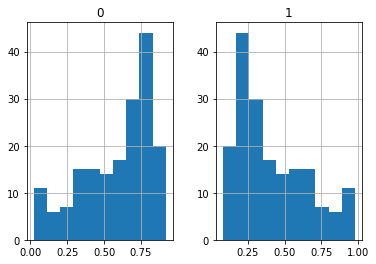

In [106]:
pd.DataFrame(P_tepred).hist()
plt.show()

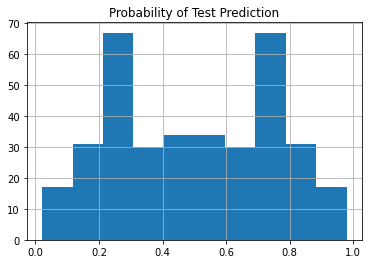

In [107]:
pd.DataFrame(P_tepred.flatten(), 
             columns=['Probability of Test Prediction']).hist()
plt.show()

In [108]:
## Confusion Matrix
metrics.confusion_matrix(Y_test, Y_tepred)

array([[99, 15],
       [21, 44]], dtype=int64)

In [109]:
conf_mat_tr = metrics.confusion_matrix(Y_test, Y_tepred)
pd.DataFrame(conf_mat_tr, index=['True: 0', 'True: 1'], columns=['Pred: 0', 'Pred: 1'])

,Pred: 0,Pred: 1
True: 0,99,15
True: 1,21,44


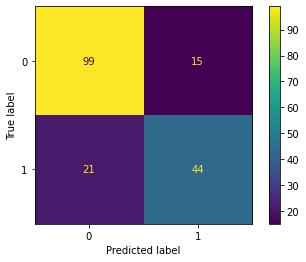

In [110]:
metrics.plot_confusion_matrix(algo_logitreg, X_test_fes, Y_test,
                              display_labels=algo_logitreg.classes_)
plt.show()

In [111]:
def evaluation_class_ConfusionMatrix(Y_true, Y_pred):
    conf_mat = metrics.confusion_matrix(Y_true, Y_pred)
    conf_mat = pd.DataFrame(conf_mat, 
                            index=['True: 0', 'True: 1'], 
                            columns=['Pred: 0', 'Pred: 1'])
    
    return conf_mat

In [112]:
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

,Pred: 0,Pred: 1
True: 0,99,15
True: 1,21,44


In [113]:
## Classification Metrics
metrics.classification_report(Y_test, Y_tepred, target_names=['class 0', 'class 1'])

'              precision    recall  f1-score   support\n\n     class 0       0.82      0.87      0.85       114\n     class 1       0.75      0.68      0.71        65\n\n    accuracy                           0.80       179\n   macro avg       0.79      0.77      0.78       179\nweighted avg       0.80      0.80      0.80       179\n'

In [114]:
print(metrics.classification_report(Y_test, Y_tepred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.82      0.87      0.85       114
     class 1       0.75      0.68      0.71        65

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



In [115]:
def evaluation_class_ClassificationReport(Y_true, Y_pred):
    print(metrics.classification_report(Y_true, Y_pred, 
                                        target_names=['class 0', 'class 1']))

In [116]:
evaluation_class_ClassificationReport(Y_test, Y_tepred)

              precision    recall  f1-score   support

     class 0       0.82      0.87      0.85       114
     class 1       0.75      0.68      0.71        65

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



In [117]:
## ROC Curve + AUC
fpr, tpr, thresholds = metrics.roc_curve(Y_test, P_tepred[:,1])
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.00877193, 0.00877193,
        0.01754386, 0.01754386, 0.01754386, 0.01754386, 0.02631579,
        0.02631579, 0.03508772, 0.03508772, 0.06140351, 0.06140351,
        0.07017544, 0.07017544, 0.0877193 , 0.0877193 , 0.09649123,
        0.09649123, 0.10526316, 0.10526316, 0.12280702, 0.12280702,
        0.16666667, 0.16666667, 0.18421053, 0.18421053, 0.20175439,
        0.20175439, 0.21052632, 0.21052632, 0.21929825, 0.21929825,
        0.23684211, 0.23684211, 0.25438596, 0.28070175, 0.28070175,
        0.30701754, 0.30701754, 0.3245614 , 0.3245614 , 0.34210526,
        0.35964912, 0.36842105, 0.36842105, 0.37719298, 0.39473684,
        0.40350877, 0.42105263, 0.42982456, 0.44736842, 0.45614035,
        0.47368421, 0.48245614, 0.51754386, 0.53508772, 0.54385965,
        0.56140351, 0.57894737, 0.57894737, 0.59649123, 0.59649123,
        0.61403509, 0.62280702, 0.66666667, 0.6754386 , 0.72807018,
        0.75438596, 0.76315789, 0.77192982, 0.82

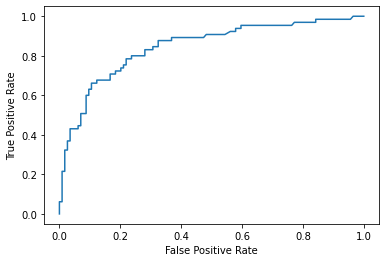

In [118]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, P_tepred[:,1])
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [119]:
metrics.auc(fpr, tpr)

0.8447368421052632

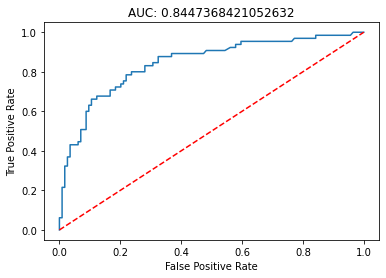

In [120]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, P_tepred[:,1])
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1],'r--')
plt.title('AUC: ' + str(metrics.auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [121]:
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

,Pred: 0,Pred: 1
True: 0,99,15
True: 1,21,44


In [122]:
cm = evaluation_class_ConfusionMatrix(Y_test, Y_tepred)
recall = cm.iloc[1,1] / cm.sum(axis=1).values[1]
fallout = cm.iloc[0,1] / cm.sum(axis=1).values[0]
recall, fallout

(0.676923076923077, 0.13157894736842105)

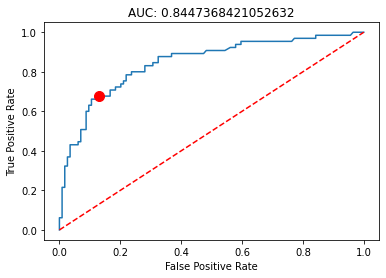

In [123]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, P_tepred[:,1])
cm = evaluation_class_ConfusionMatrix(Y_test, Y_tepred)
recall = cm.iloc[1,1] / cm.sum(axis=1).values[1]
fallout = cm.iloc[0,1] / cm.sum(axis=1).values[0]
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1],'r--')
plt.plot([fallout], [recall], 'ro', ms=10)
plt.title('AUC: ' + str(metrics.auc(fpr, tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [124]:
def evaluation_class_ROCAUC(Y_true, P_pred, figsize=(10,5)):
    fpr, tpr, thresholds = metrics.roc_curve(Y_true, P_pred)
    cm = evaluation_class_ConfusionMatrix(Y_true, P_pred>=0.5)
    recall = cm.iloc[1,1] / cm.sum(axis=1).values[1]
    fallout = cm.iloc[0,1] / cm.sum(axis=1).values[0]
    
    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.plot([0, 1], [0, 1],'r--')
    plt.plot([fallout], [recall], 'ro', ms=10)
    plt.title('AUC: ' + str(metrics.auc(fpr, tpr)), fontsize=15)
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.show()

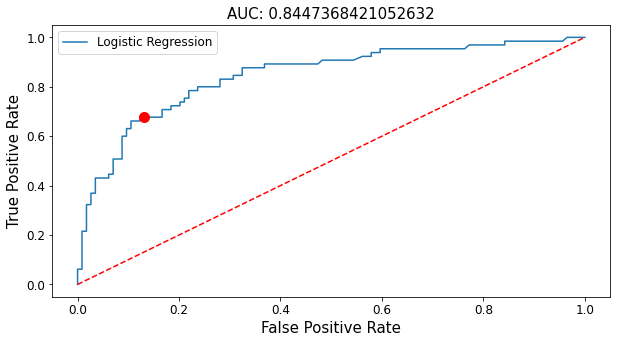

In [125]:
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

In [126]:
## Precision-Recall Curve
metrics.precision_recall_curve(Y_test, P_tepred[:,1])

(array([0.37142857, 0.3699422 , 0.37209302, 0.37426901, 0.37647059,
        0.37869822, 0.38095238, 0.38323353, 0.3902439 , 0.39263804,
        0.39506173, 0.39751553, 0.4       , 0.39622642, 0.40127389,
        0.40384615, 0.40645161, 0.40909091, 0.41176471, 0.41447368,
        0.41721854, 0.41610738, 0.41891892, 0.42758621, 0.43356643,
        0.43971631, 0.44604317, 0.44927536, 0.46616541, 0.46969697,
        0.47692308, 0.47286822, 0.4765625 , 0.48031496, 0.47619048,
        0.48387097, 0.48760331, 0.49166667, 0.5       , 0.5042735 ,
        0.50862069, 0.51304348, 0.51754386, 0.51785714, 0.52727273,
        0.53211009, 0.54205607, 0.54716981, 0.55769231, 0.5631068 ,
        0.57425743, 0.58      , 0.57575758, 0.58163265, 0.59375   ,
        0.6       , 0.60638298, 0.60215054, 0.59782609, 0.6043956 ,
        0.61111111, 0.60674157, 0.61363636, 0.62068966, 0.62790698,
        0.62352941, 0.61904762, 0.64197531, 0.65      , 0.65822785,
        0.65384615, 0.66233766, 0.67105263, 0.66

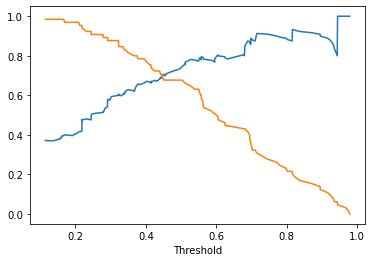

In [127]:
pre, rec, thresholds = metrics.precision_recall_curve(Y_test, P_tepred[:,1])
plt.plot(thresholds, pre[:-1], label='Precision')
plt.plot(thresholds, rec[1:], label='Recall')
plt.xlabel('Threshold')
plt.show()

In [128]:
def evaluation_class_PrecisionRecall(Y_true, P_pred, figsize=(10,5)):
    pre, rec, thresholds = metrics.precision_recall_curve(Y_true, P_pred)
    
    plt.figure(figsize=figsize)
    plt.plot(thresholds, pre[:-1], label='Precision')
    plt.plot(thresholds, rec[1:], label='Recall')
    plt.xlabel('Threshold', fontsize=15)
    plt.ylabel('', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.show()

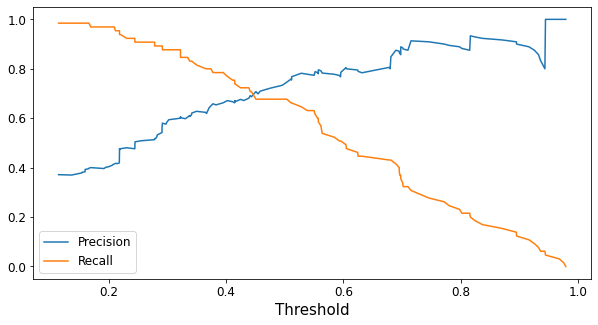

In [129]:
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## Code Summary

In [130]:
# Confusion Matrix
def evaluation_class_ConfusionMatrix(Y_true, Y_pred):
    conf_mat = metrics.confusion_matrix(Y_true, Y_pred)
    conf_mat = pd.DataFrame(conf_mat, 
                            index=['True: 0', 'True: 1'], 
                            columns=['Pred: 0', 'Pred: 1'])
    
    return conf_mat


# Classification Metrics
def evaluation_class_ClassificationReport(Y_true, Y_pred):
    print(metrics.classification_report(Y_true, Y_pred, 
                                        target_names=['class 0', 'class 1']))
    

# ROC Curve + AUC
def evaluation_class_ROCAUC(Y_true, P_pred, figsize=(10,5)):
    fpr, tpr, thresholds = metrics.roc_curve(Y_true, P_pred)
    cm = evaluation_class_ConfusionMatrix(Y_true, P_pred>=0.5)
    recall = cm.iloc[1,1] / cm.sum(axis=1).values[1]
    fallout = cm.iloc[0,1] / cm.sum(axis=1).values[0]
    
    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.plot([0, 1], [0, 1],'r--')
    plt.plot([fallout], [recall], 'ro', ms=10)
    plt.title('AUC: ' + str(metrics.auc(fpr, tpr)), fontsize=15)
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.show()
    
    
# Precision-Recall Curve
def evaluation_class_PrecisionRecall(Y_true, P_pred, figsize=(10,5)):
    pre, rec, thresholds = metrics.precision_recall_curve(Y_true, P_pred)
    
    plt.figure(figsize=figsize)
    plt.plot(thresholds, pre[:-1], label='Precision')
    plt.plot(thresholds, rec[1:], label='Recall')
    plt.xlabel('Threshold', fontsize=15)
    plt.ylabel('', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.show()

(712, 11) (712, 1)
(179, 11) (179, 1)
Optimization terminated successfully.
         Current function value: 0.414285
         Iterations 17
Effect of X..


,features,coef,odds
0,const,2.00,7.39
1,Pclass,-1.44,0.24
2,Age,-3.08,0.05
3,SibSp,-0.97,0.38
4,Parch,0.01,1.01
5,Fare,0.75,2.12
6,Cabin,-0.54,0.58
7,Name_Mrs,2.14,8.50
8,Embarked_S,-0.53,0.59


Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.76      0.89      0.82       435
     class 1       0.76      0.56      0.64       277

    accuracy                           0.76       712
   macro avg       0.76      0.72      0.73       712
weighted avg       0.76      0.76      0.75       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.82      0.87      0.85       114
     class 1       0.75      0.68      0.71        65

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

ROC Curve: Train


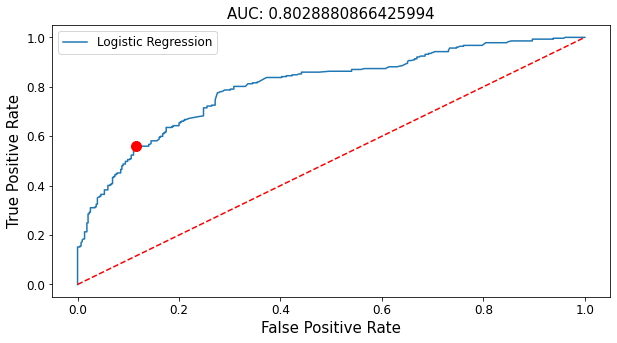

ROC Curve: Test


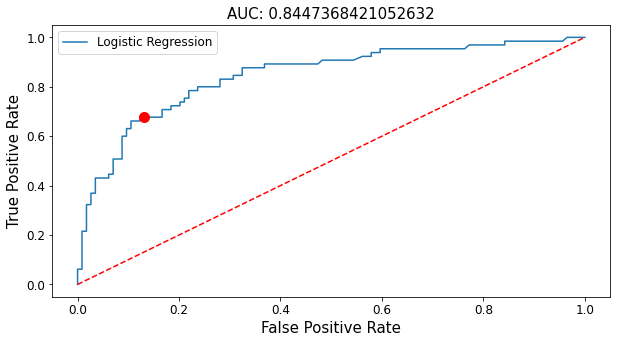

Precision-Recall Curve: Train


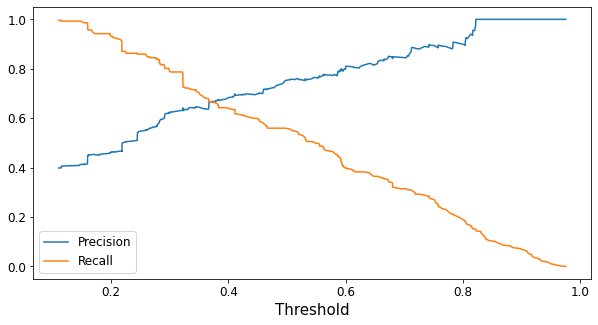

Precision-Recall Curve: Test


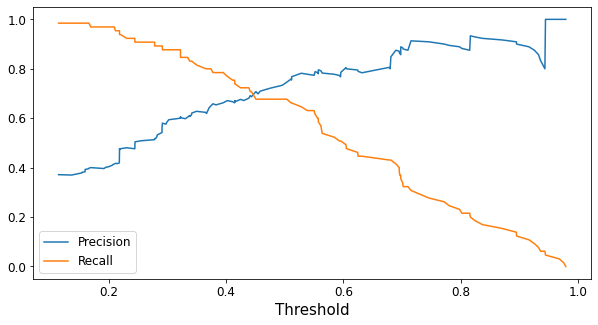

In [131]:
# Data Loading
location = r'.\Data\Titanic\Titanic.csv'
df = pd.read_csv(location)

# Preprocessing
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# 로지스틱 적용 (statsmodels)
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)
algo_logitreg = sm.Logit(Y_train, X_train_fes).fit()
## 유의한 변수 선택
pval_criteria = 0.5
good = algo_logitreg.pvalues <= pval_criteria
X_colname_good = list(good.index[good == True])
## 로지스틱 재적용 (sklearn)
X_train_fes = X_train_fes[X_colname_good].copy()
X_test_fes = X_test_fes[X_colname_good].copy()

algo_logitreg = LogisticRegression(fit_intercept=False)
algo_logitreg.fit(X_train_fes, Y_train)

## 계수 해석
print("Effect of X..")
display(pd.DataFrame({'features': X_train_fes.columns,
                      'coef': algo_logitreg.coef_[0],
                      'odds': np.exp(algo_logitreg.coef_[0])}))

# 예측
Y_trpred = algo_logitreg.predict(X_train_fes)
Y_tepred = algo_logitreg.predict(X_test_fes)

# 평가/검증
P_trpred = algo_logitreg.predict_proba(X_train_fes)
P_tepred = algo_logitreg.predict_proba(X_test_fes)

## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1])
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

# Summary: insufficient for me
**1) 데이터 핸들링**  

**2) 단계이해**  
>**1. Import Library**  
**2. Data Loading**   
**3. Preprocessing(Rearrange of Data)**   
**4. Applying Base Algorithm**   
**5. Evaluation**  

**3) 결과 해석**  

## Customized Function

In [132]:
### Preprocessing
def fillnull(df):
    # 결측값 처리
    ## Age
    df_agem = df[df.Sex == 'male']
    df_agem = df_agem[['Age']].fillna(df_agem[['Age']].mean())

    df_agefm = df[df.Sex == 'female']
    df_agefm = df_agefm[['Age']].fillna(df_agefm[['Age']].mean())
    df[['Age']] = pd.concat([df_agem, df_agefm], axis=0).sort_index()

    ## Embarked
    df[['Embarked']] = df[['Embarked']].fillna(df['Embarked'].mode()[0], axis=0)

    ## Cabin
    df['Cabin'] = df['Cabin'].str.slice(0,1)
    df['Cabin'] = df['Cabin'].fillna('Temp')
    
    return df


def prep(df):
    # Name
    name_sub = df['Name'].str.split(',', expand=True)[1]
    name_sub = name_sub.str.split('. ', expand=True)[0]
    name_sub.replace([' Mr'], 'Mr', inplace=True)
    name_sub.replace([' Mrs'], 'Mrs', inplace=True)
    name_sub.replace([' Ms', ' Miss'], 'Miss', inplace=True)
    name_sub.replace([' Don', ' Mme', ' Lady', 'Sir', 'Mlle', ' th', ' Jonkheer'], 'Noble', inplace=True)
    name_sub.replace([' Master', ' Major', ' Col', ' Capt', ' Sir', ' Mlle', ' Jonkheer'], 'Officer', inplace=True)
    name_sub.replace([' Dr', ' Rev'], 'Priest', inplace=True)
    df['Name'] = name_sub.copy()

    # Ticket
    df['Ticket'] = df['Ticket'].str.replace('.','').str.replace('/','')
    df['Ticket'] = df['Ticket'].str.strip().str.split(' ').str[0]
    df.loc[df['Ticket'].str.isdigit(), 'Ticket'] = 'NUM'

    # Age
    age_interval = [10, 20, 30, 40, 50, 60, 70, 80, 90]
    if df['Age'].max() > len(age_interval):
        df['Age'] = np.digitize(df['Age'], bins=age_interval)
        
    return df


def datasplit(df, Y_colname, test_size=0.2, random_state=123):
    X_colname = [x for x in df.columns if x not in Y_colname]
       
    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                        test_size=test_size, random_state=random_state)
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test


def label_encoding(X_train, X_test, colname, encoder):
    X_train_le = X_train.copy()
    X_test_le = X_test.copy()
    
    for i in colname: # 대상 변수들마다
        encoder = encoder.fit(X_train[i])

        for label in X_test[i].unique():
            if label not in encoder.classes_:
                encoder.classes_ = np.append(encoder.classes_, label)

        X_train_le[i] = encoder.transform(X_train[i])
        X_test_le[i] = encoder.transform(X_test[i])
        
    return X_train_le, X_test_le


def onehot_encoding(df, colname):
    df_ohe = df.copy()
    
    for i in colname:
        if i in df.columns:
            df_ohe = pd.get_dummies(df_ohe, columns=[i], drop_first=True)
            
    return df_ohe


def col_mapping(X_train, X_test):
    X_tr = X_train.copy()
    X_te = X_test.copy()
    
    # checking the difference of columns
    X_te_noncol = [i for i in X_tr.columns if i not in X_te.columns]
    X_tr_noncol = [i for i in X_te.columns if i not in X_tr.columns]

    # duplicates
    if X_te_noncol != []:
        for i in X_te_noncol:
            X_te[i] = 0
            X_te = X_te[X_tr.columns].copy()
            
    if X_tr_noncol != []:
        for i in X_tr_noncol:
            X_tr[i] = 0
            X_tr = X_tr[X_te.columns].copy()
            
    return X_tr, X_te


def scale(scaler, X_train, X_test):
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                                   index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                                  index=X_test.index, columns=X_test.columns)
    
    return X_train_scaling, X_test_scaling


### Evaluation
# Confusion Matrix
def evaluation_class_ConfusionMatrix(Y_true, Y_pred):
    conf_mat = metrics.confusion_matrix(Y_true, Y_pred)
    conf_mat = pd.DataFrame(conf_mat, 
                            index=['True: 0', 'True: 1'], 
                            columns=['Pred: 0', 'Pred: 1'])
    
    return conf_mat


# Classification Metrics
def evaluation_class_ClassificationReport(Y_true, Y_pred):
    print(metrics.classification_report(Y_true, Y_pred, 
                                        target_names=['class 0', 'class 1']))
    

# ROC Curve + AUC
def evaluation_class_ROCAUC(Y_true, P_pred, figsize=(10,5)):
    fpr, tpr, thresholds = metrics.roc_curve(Y_true, P_pred)
    cm = evaluation_class_ConfusionMatrix(Y_true, P_pred>=0.5)
    recall = cm.iloc[1,1] / cm.sum(axis=1).values[1]
    fallout = cm.iloc[0,1] / cm.sum(axis=1).values[0]
    
    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.plot([0, 1], [0, 1],'r--')
    plt.plot([fallout], [recall], 'ro', ms=10)
    plt.title('AUC: ' + str(metrics.auc(fpr, tpr)), fontsize=15)
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.show()
    
    
# Precision-Recall Curve
def evaluation_class_PrecisionRecall(Y_true, P_pred, figsize=(10,5)):
    pre, rec, thresholds = metrics.precision_recall_curve(Y_true, P_pred)
    
    plt.figure(figsize=figsize)
    plt.plot(thresholds, pre[:-1], label='Precision')
    plt.plot(thresholds, rec[1:], label='Recall')
    plt.xlabel('Threshold', fontsize=15)
    plt.ylabel('', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.show()

## Default

(712, 11) (712, 1)
(179, 11) (179, 1)
Effect of X..


,features,coef,odds
0,PassengerId,0.00,1.00
1,Pclass,-0.24,0.78
2,Age,-0.20,0.82
3,SibSp,-0.24,0.79
4,Parch,0.25,1.28
5,Fare,0.01,1.01


Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.68      0.93      0.79       435
     class 1       0.75      0.31      0.44       277

    accuracy                           0.69       712
   macro avg       0.71      0.62      0.61       712
weighted avg       0.71      0.69      0.65       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.71      0.93      0.81       114
     class 1       0.73      0.34      0.46        65

    accuracy                           0.72       179
   macro avg       0.72      0.63      0.63       179
weighted avg       0.72      0.72      0.68       179

ROC Curve: Train


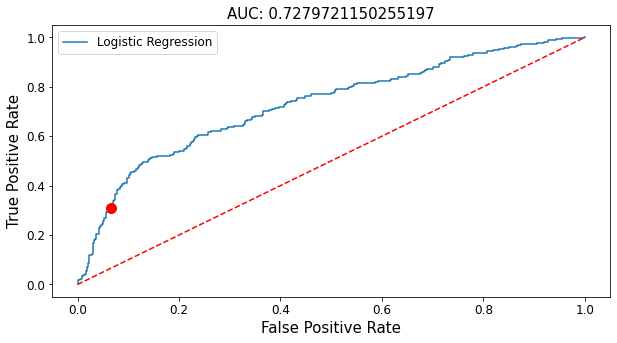

ROC Curve: Test


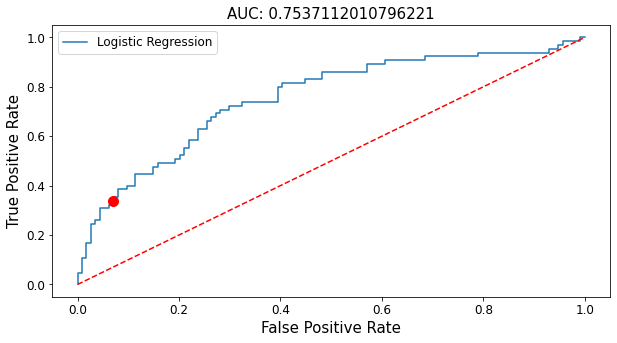

Precision-Recall Curve: Train


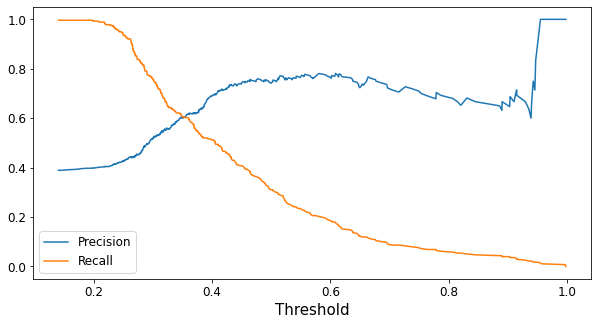

Precision-Recall Curve: Test


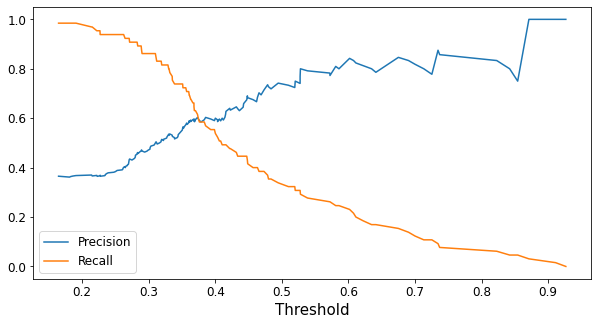

In [133]:
# Data Loading
location = r'.\Data\Titanic\Titanic.csv'
df = pd.read_csv(location)

# Preprocessing
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

###
X_train_fes = X_train[X_train.columns[X_train.dtypes != 'object']]
X_test_fes = X_test[X_test.columns[X_test.dtypes != 'object']]
###

# label_colname = ['Sex', 'Cabin', 'Ticket']
# encoder = preprocessing.LabelEncoder()
# X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

# onehot_colname = ['Name', 'Embarked']
# X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
# X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
# X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

# scaler = preprocessing.MinMaxScaler()
# X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# # 로지스틱 적용 (statsmodels)
# X_train_fes = sm.add_constant(X_train_fes)
# X_test_fes = sm.add_constant(X_test_fes)
# algo_logitreg = sm.Logit(Y_train, X_train_fes).fit()
# ## 유의한 변수 선택
# pval_criteria = 0.5
# good = algo_logitreg.pvalues <= pval_criteria
# X_colname_good = list(good.index[good == True])
## 로지스틱 재적용 (sklearn)
# X_train_fes = X_train_fes[X_colname_good].copy()
# X_test_fes = X_test_fes[X_colname_good].copy()

algo_logitreg = LogisticRegression(fit_intercept=False)
algo_logitreg.fit(X_train_fes, Y_train)

## 계수 해석
print("Effect of X..")
display(pd.DataFrame({'features': X_train_fes.columns,
                      'coef': algo_logitreg.coef_[0],
                      'odds': np.exp(algo_logitreg.coef_[0])}))

# 예측
Y_trpred = algo_logitreg.predict(X_train_fes)
Y_tepred = algo_logitreg.predict(X_test_fes)

# 평가/검증
P_trpred = algo_logitreg.predict_proba(X_train_fes)
P_tepred = algo_logitreg.predict_proba(X_test_fes)

## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1])
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## With Feature Engineering and Scaling

(712, 11) (712, 1)
(179, 11) (179, 1)
Optimization terminated successfully.
         Current function value: 0.414285
         Iterations 17
Effect of X..


,features,coef,odds
0,const,2.00,7.39
1,Pclass,-1.44,0.24
2,Age,-3.08,0.05
3,SibSp,-0.97,0.38
4,Parch,0.01,1.01
5,Fare,0.75,2.12
6,Cabin,-0.54,0.58
7,Name_Mrs,2.14,8.50
8,Embarked_S,-0.53,0.59


Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.76      0.89      0.82       435
     class 1       0.76      0.56      0.64       277

    accuracy                           0.76       712
   macro avg       0.76      0.72      0.73       712
weighted avg       0.76      0.76      0.75       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.82      0.87      0.85       114
     class 1       0.75      0.68      0.71        65

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

ROC Curve: Train


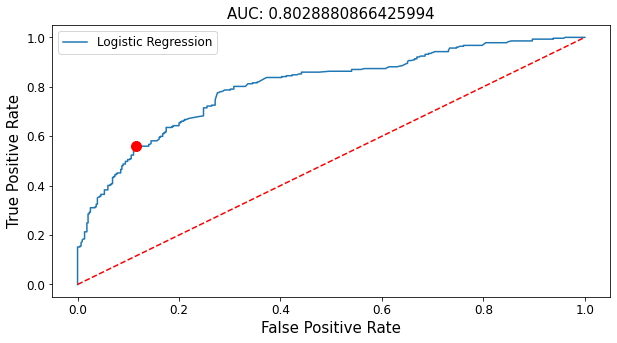

ROC Curve: Test


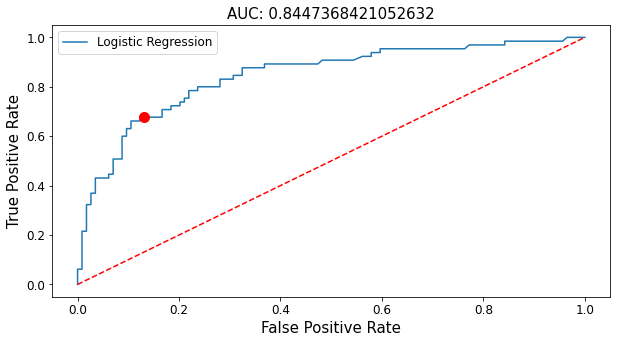

Precision-Recall Curve: Train


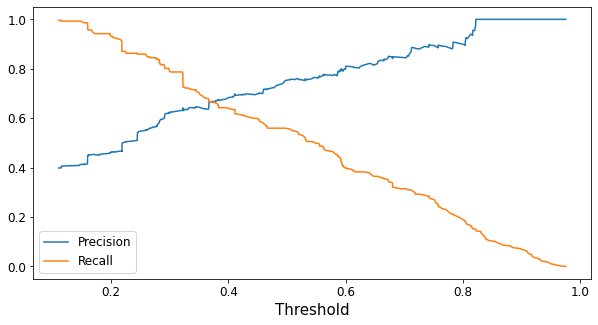

Precision-Recall Curve: Test


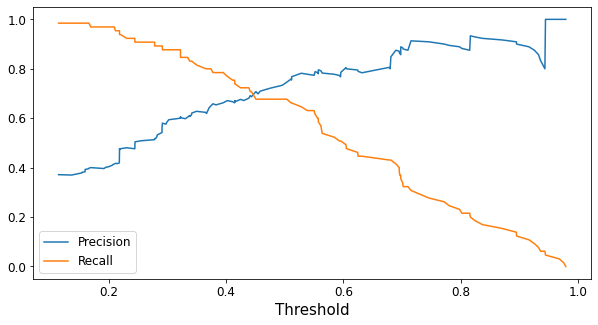

In [134]:
# Data Loading
location = r'.\Data\Titanic\Titanic.csv'
df = pd.read_csv(location)

# Preprocessing
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# 로지스틱 적용 (statsmodels)
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)
algo_logitreg = sm.Logit(Y_train, X_train_fes).fit()
## 유의한 변수 선택
pval_criteria = 0.5
good = algo_logitreg.pvalues <= pval_criteria
X_colname_good = list(good.index[good == True])
## 로지스틱 재적용 (sklearn)
X_train_fes = X_train_fes[X_colname_good].copy()
X_test_fes = X_test_fes[X_colname_good].copy()

algo_logitreg = LogisticRegression(fit_intercept=False)
algo_logitreg.fit(X_train_fes, Y_train)

## 계수 해석
print("Effect of X..")
display(pd.DataFrame({'features': X_train_fes.columns,
                      'coef': algo_logitreg.coef_[0],
                      'odds': np.exp(algo_logitreg.coef_[0])}))

# 예측
Y_trpred = algo_logitreg.predict(X_train_fes)
Y_tepred = algo_logitreg.predict(X_test_fes)

# 평가/검증
P_trpred = algo_logitreg.predict_proba(X_train_fes)
P_tepred = algo_logitreg.predict_proba(X_test_fes)

## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1])
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])